# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="right",indicator=True)
# Display the data table for preview
combined_data.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     b128    Capomulin  Female           9          22          0   
1     f932     Ketapril    Male          15          29          0   
2     g107     Ketapril  Female           2          29          0   
3     a457     Ketapril  Female          11          30          0   
4     c819     Ketapril    Male          21          25          0   

   Tumor Volume (mm3)  Metastatic Sites _merge  
0                45.0                 0   both  
1                45.0                 0   both  
2                45.0                 0   both  
3                45.0                 0   both  
4                45.0                 0   both

In [3]:
# Checking the number of mice.
len(combined_data ["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint"],keep=False),:]
pd.unique(duplicate_mice["Mouse ID"])

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_all=combined_data.loc[combined_data["Mouse ID"]=="g989",:]
duplicate_mice_all

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
107      g989     Propriva  Female          21          26          0   
137      g989     Propriva  Female          21          26          0   
329      g989     Propriva  Female          21          26          5   
360      g989     Propriva  Female          21          26          5   
620      g989     Propriva  Female          21          26         10   
681      g989     Propriva  Female          21          26         10   
815      g989     Propriva  Female          21          26         15   
869      g989     Propriva  Female          21          26         15   
950      g989     Propriva  Female          21          26         20   
1111     g989     Propriva  Female          21          26         20   
1195     g989     Propriva  Female          21          26         25   
1380     g989     Propriva  Female          21          26         30   
1592     g989     Propriva  Female          21          26         35   

      Tumor Volume (mm3)  Metastatic Sites _merge  
107            45.000000                 0   both  
137            45.000000                 0   both  
329            48.786801                 0   both  
360            47.570392                 0   both  
620            51.745156                 0   both  
681            49.880528                 0   both  
815            51.325852                 1   both  
869            53.442020                 0   both  
950            55.326122                 1   both  
1111           54.657650                 1   both  
1195           56.045564                 1   both  
1380           59.082294                 1   both  
1592           62.570880                 2   both

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_data[combined_data["Mouse ID"]!="g989"]
clean_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        b128    Capomulin  Female           9          22          0   
1        f932     Ketapril    Male          15          29          0   
2        g107     Ketapril  Female           2          29          0   
3        a457     Ketapril  Female          11          30          0   
4        c819     Ketapril    Male          21          25          0   
...       ...          ...     ...         ...         ...        ...   
1888     r944    Capomulin    Male          12          25         45   
1889     u364    Capomulin    Male          18          17         45   
1890     p438     Ceftamin  Female          11          26         45   
1891     x773      Placebo  Female          21          30         45   
1892     b879     Stelasyn  Female           4          26         45   

      Tumor Volume (mm3)  Metastatic Sites _merge  
0              45.000000                 0   both  
1              45.000000                 0   both  
2              45.000000                 0   both  
3              45.000000                 0   both  
4              45.000000                 0   both  
...                  ...               ...    ...  
1888           41.581521                 2   both  
1889           31.023923                 3   both  
1890           61.433892                 1   both  
1891           58.634971                 4   both  
1892           72.555239                 2   both  

[1880 rows x 9 columns]

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].unique()
print(len(clean_df["Mouse ID"].unique()))

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_group=combined_data.groupby(["Drug Regimen"])

tumor_mean =regimen_group["Tumor Volume (mm3)"].mean()
tumor_mean
tumor_median=regimen_group["Tumor Volume (mm3)"].median()
tumor_median
tumor_var=regimen_group["Tumor Volume (mm3)"].var()
tumor_var
tumor_std=regimen_group["Tumor Volume (mm3)"].std()
tumor_std
tumor_sem=regimen_group["Tumor Volume (mm3)"].sem()
tumor_sem

#st=pd.concat([tumor_mean,tumor_median,tumor_var,tumor_std,tumor_sem],axis=1)

#Assemble the resulting series into a single summary DataFrame.
statistics_sum=pd.DataFrame({"Mean Tumor Volume":tumor_mean,
                             "Median Tumor Volume":tumor_median,
                             "Tumor Volume Variance":tumor_var,
                             "Tumor Volume Std.Dev.":tumor_std,
                             "Tumor Volume Std.Err.":tumor_sem})

statistics_sum


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std.Dev.  Tumor Volume Std.Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.507770               0.512884  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

In [9]:

# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
sum_statistics=regimen_group.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
sum_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

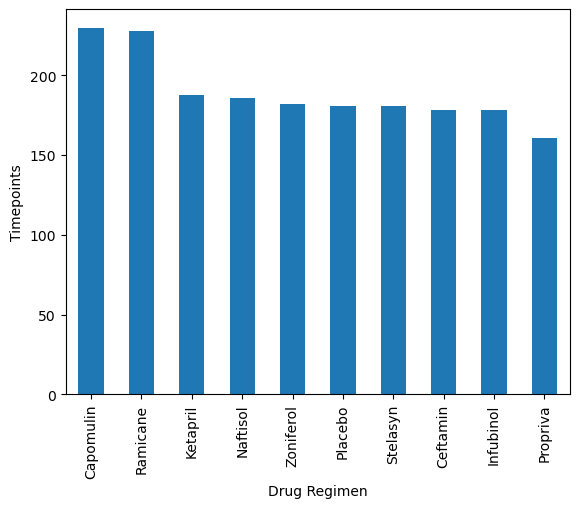

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints=regimen_group.count()["Timepoint"].sort_values(ascending=False)
timepoints.plot(kind="bar", figsize=(6.5,5)).set_ylabel("Timepoints");

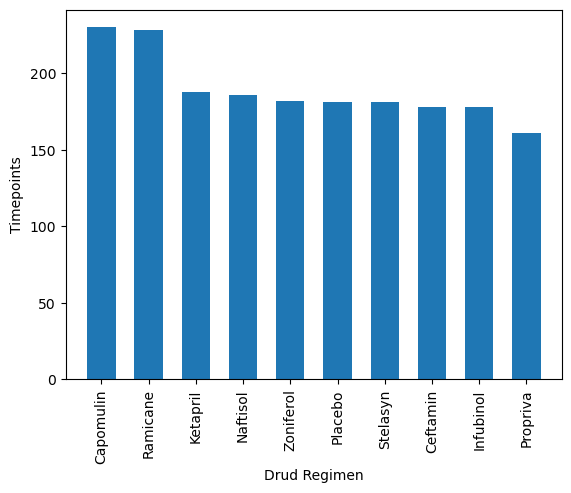

In [11]:


# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis=timepoints.values
x_axis=timepoints.index
plt.bar(x_axis, y_axis, width=0.6,align="center")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xticks(x_axis,rotation='vertical')
plt.xlabel("Drud Regimen")
plt.ylabel("Timepoints")
plt.show()

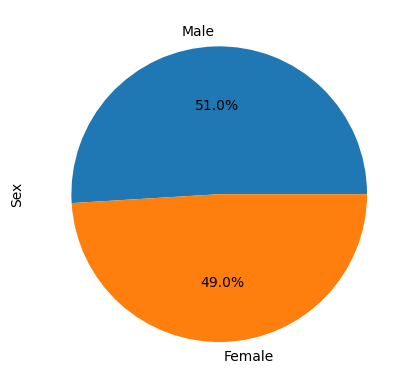

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = clean_df.groupby("Sex").count()["Mouse ID"].sort_values(ascending=False)
gender_pie_plot=gender_pie.plot(kind="pie", y='Sex',autopct='%.1f%%') 
gender_pie_plot.set_ylabel("Sex")
plt.show();

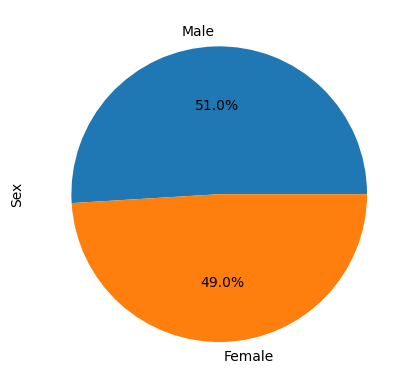

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart

labels = ["Male", "Female"]
sizes=[gender_pie[0],gender_pie[1]] #or sizes = [958,922]
colors = ["tab:blue", "tab:orange"]
plt.pie(sizes, labels=labels, colors=colors,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show();


## Quartiles, Outliers and Boxplots

In [232]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Start by getting the last (greatest) timepoint for each mouse
b=clean_df.groupby("Mouse ID").max("Timepoint").reset_index()
m_timepoints=b [["Mouse ID", "Timepoint"]]
print(m_timepoints)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
a=pd.merge(m_timepoints,clean_df,on=["Mouse ID","Timepoint"])
print(a)

#Creating lists for each regimen
Infubinol=a.loc[(a["Drug Regimen"]=="Infubinol"),"Tumor Volume (mm3)"]
Infubinol_list = Infubinol.values.tolist()
print(Infubinol_list)

Capomulin=a.loc[(a["Drug Regimen"]=="Capomulin"),"Tumor Volume (mm3)"]
Capomulin_list = Capomulin.values.tolist()
print(Capomulin_list)

Ramicane=a.loc[(a["Drug Regimen"]=="Ramicane"),"Tumor Volume (mm3)"]
Ramicane_list = Ramicane.values.tolist()
print(Ramicane_list)

Ceftamin=a.loc[(a["Drug Regimen"]=="Ceftamin"),"Tumor Volume (mm3)"]
Ceftamin_list = Ceftamin.values.tolist()
print(Ceftamin_list)

#regimens4_df=clean_df.loc[(clean_df ["Drug Regimen"]=='Capomulin') | (clean_df ["Drug Regimen"]=='Ramicane') | (clean_df ["Drug Regimen"]=='Infubinol') | (clean_df ["Drug Regimen"]=='Ceftamin')]
#print(regimens4_df)
#d=clean_df.groupby("Mouse ID").index().max("Timepoint")

# Start by getting the last (greatest) timepoint for each mouse
#mice_timepoint=regimens4_df[["Mouse ID", "Timepoint"]]

#mice_max_timepoint=mice_timepoint.groupby("Mouse ID").max("Timepoint")
#mice_max_timepoint.reset_index(inplace=True)
#print(mice_max_timepoint)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#d=pd.merge(mice_max_timepoint,regimens4_df,on=["Mouse ID","Timepoint"])


    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]
    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Fe

In [306]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_volume= [Capomulin_list, Ramicane_list, Infubinol_list, Ceftamin_list] 
name=[Capomulin, Ramicane, Infubinol, Ceftamin]
# Create empty list to fill with tumor vol data (for plotting)
Tum_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
#First, calculating Quartiles and IQR

for y in tumor_volume:
    Q1=np.percentile(y,25,interpolation = 'midpoint'),
    Q3=np.percentile(y,75,interpolation = 'midpoint'),
    IQR=st.iqr(y)
    upper=Q3+1.5*IQR
    lower=Q1-1.5*IQR
    #upper_array=np.array(y>=upper)
    #lower_array=np.array(y<=lower)
    for n in y:
        if (n>=upper) | (n<= lower):
            print(f"The outlier is {n}")
        
        
outlier=clean_df.loc[clean_df["Tumor Volume (mm3)"]==36.3213458,:]
outlier
    # print(f"Q1={Q1}\
    #       Q3={Q3}\
    #       IQR={IQR}\
    #       upper_bound={upper}\
    #       lower_bound={lower}\
    #       upper_array={upper_array}\
    #       lower_array={lower_array}")

 

#for x in tumor_volume:
    #print(st.iqr(x))

#Capomulin_list.sort_values()
#quartiles=Capomulin_list.quantiles([.25,.5,.75])
#lowerq=quartiles[0.25]
#upperq =quartiles[0.75]
#iqr=upperq-lowerq    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The outlier is 36.3213458


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
420     c326    Infubinol  Female          18          25          5   

     Tumor Volume (mm3)  Metastatic Sites _merge  
420           36.321346                 0   both

In [258]:
for y in tumor_volume:
    print(np.percentile(y,25,interpolation = 'midpoint'))

32.37735684
31.56046955
54.04860769
48.72207785


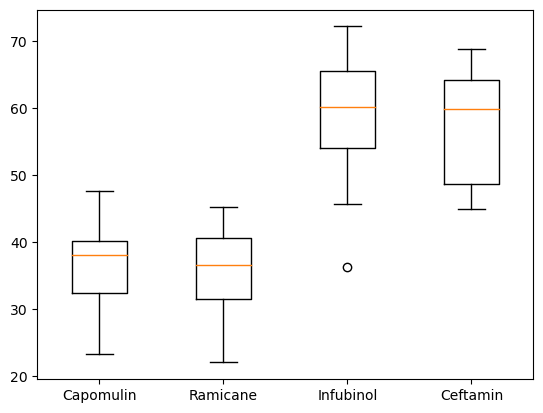

In [130]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_name=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
plt.boxplot(tumor_volume, labels = treatment_name)
plt.show()


In [ ]:
quartiles=tumor_volume.quantiles([.25,.5,.75])
lowerq=quartiles[0.25]

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

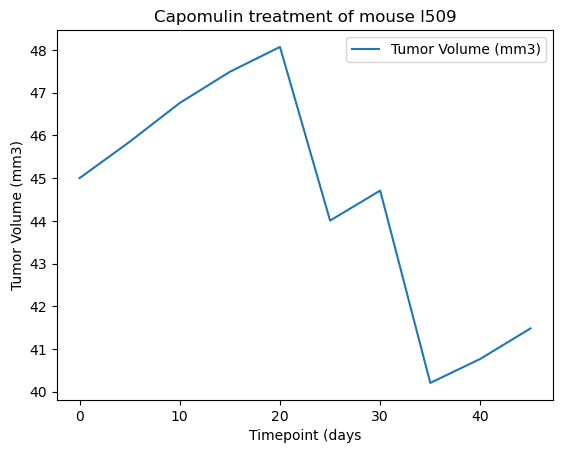

In [190]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l=clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")&(clean_df["Mouse ID"]=="l509"),:]
l.plot.line(x=("Timepoint"),y=("Tumor Volume (mm3)"))
plt.xlabel("Timepoint (days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

In [285]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
c=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",["Tumor Volume (mm3)","Weight (g)", "Drug Regimen", "Mouse ID",]]
c

Tumor Volume (mm3)  Weight (g) Drug Regimen Mouse ID
0              45.000000          22    Capomulin     b128
226            45.000000          21    Capomulin     j246
227            45.000000          17    Capomulin     r554
228            45.000000          17    Capomulin     s185
229            45.000000          21    Capomulin     b742
...                  ...         ...          ...      ...
1854           40.728578          23    Capomulin     s710
1859           38.125164          23    Capomulin     j119
1878           47.685963          24    Capomulin     i557
1888           41.581521          25    Capomulin     r944
1889           31.023923          17    Capomulin     u364

[230 rows x 4 columns]

In [287]:
d=c.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
d

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [289]:
f=c.groupby("Mouse ID").mean()["Weight (g)"]
f

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

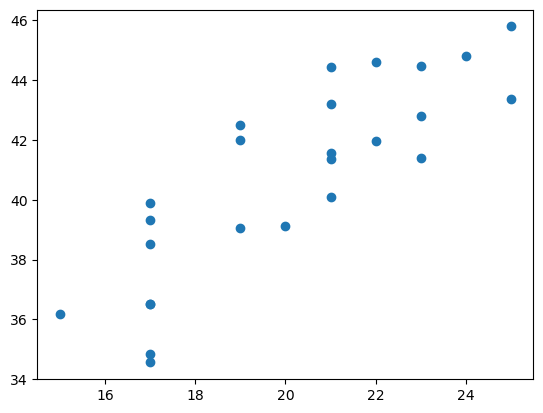

In [293]:
plt.scatter(f,d)

## Correlation and Regression

In [323]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(f,d)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}.")



The correlation between mouse weight and the average tumor volume is 0.84.
